In [1]:
import pandas as p

data = p.read_csv('diabetes.csv',header='infer')
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [2]:
Y = data['class']
X = data.drop('class',axis=1)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

In [4]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.6764227642276422

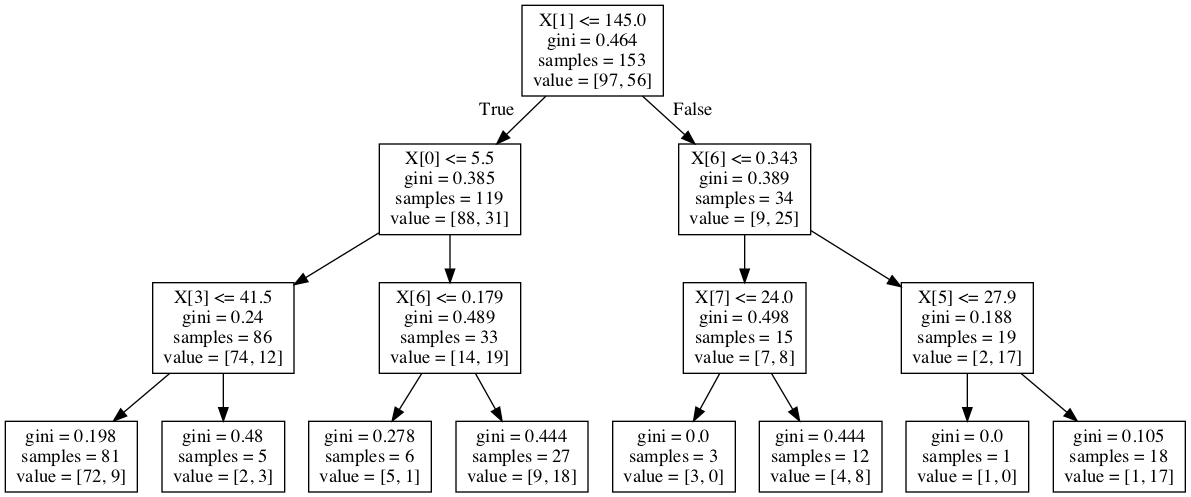

In [6]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("diabetes.pdf") 

from IPython.display import Image
Image(graph.create_png())

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred, labels=['tested_negative','tested_positive'])
cm

array([[285, 118],
       [ 81, 131]])

In [8]:
from sklearn.metrics import f1_score

f1 = f1_score(Y_test,Y_pred,labels=['tested_negative','tested_positive'],pos_label='tested_positive')
f1

0.5683297180043384

In [9]:
Y_prob = clf.predict_proba(X_test)
Y_prob

array([[0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       ...,
       [0.88888889, 0.11111111],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667]])

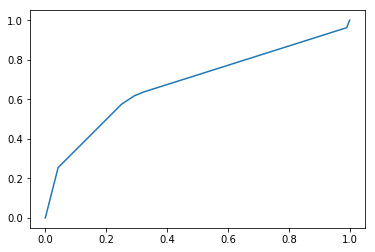

In [10]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
%matplotlib inline

true_labels = (Y_test == 'tested_positive');

fpr, tpr, thresholds = roc_curve(true_labels, Y_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)


In [11]:
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, Y, cv=5)
scores

array([0.72727273, 0.72077922, 0.74025974, 0.7124183 , 0.74509804])

In [12]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.02)
